In [1]:
import pandas as pd
import numpy as np
import pickle

import altair as alt


# importing local libraries for drawings (because they clutter)
# in Github, you can search  
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
from lib.builders import locators,towns,nations,culture as c
import lib.drawMaps as draw

with (open('world_1.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
world

In [2]:
culture = c.Culture()
culture.eons

10

# The age of the ancients

the terrain and all of the natural features are formed in the first age. Mountains, rivers, lakes, forrests. Once the land has settle, the first cities appear. 

Culture settings come from the user input, there are defaults for everything. Once specified the `.culture` placeholder can be replaced. It should not be used until this point. 

In [3]:
world.culture = culture

#### Blank world from the `landscape` age

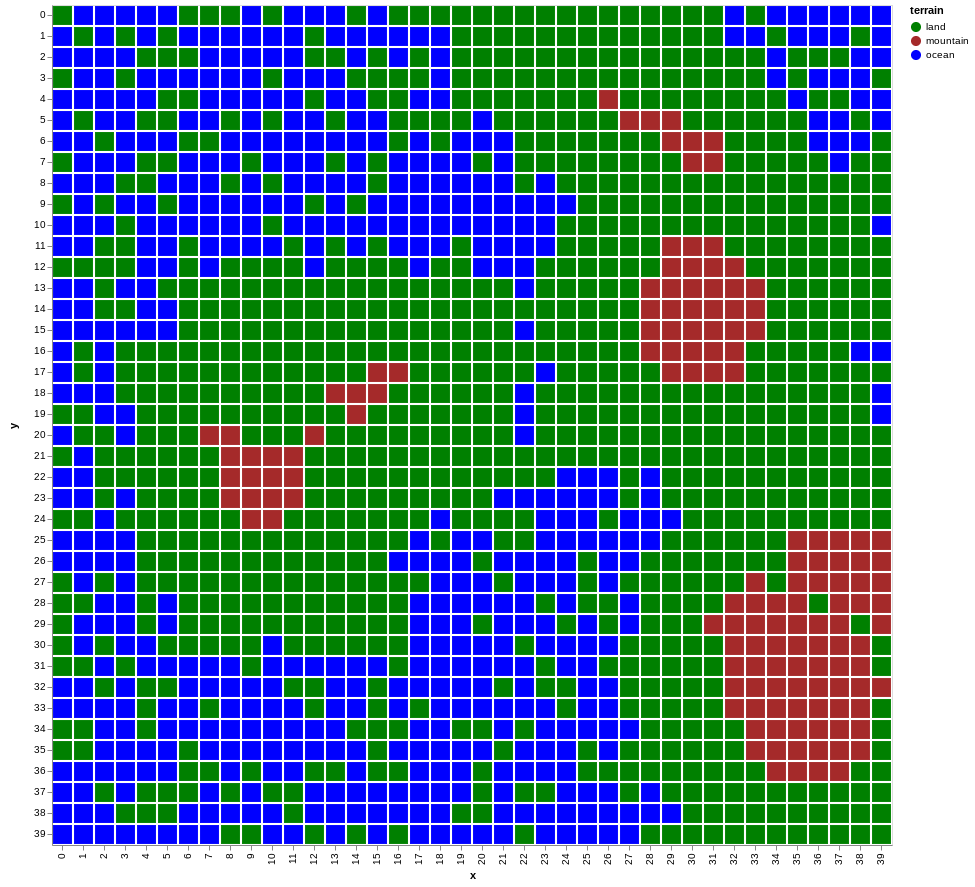

In [4]:
draw.drawTerrainTypes(world.grid_elevation,world.landscape)

the `__init__` method of a city takes a founding age and a location (which can be generated randomly via `World.get_random_chord`). The init method automatically generates a name. The default nation is the name of the town.

In [5]:
new_town = towns.Town(world.get_random_chord(),1,culture)
new_town

town of Soilkeep: population: 1 location: [34,17] founded 1

## The age of civilization

Cities grow for a set number of aeons. During each eon
* n new villages are born
* each village has g% chance to grow

at the end of this age cities merge together to become nations. 

In [6]:
all_towns = towns.build_towns(world)
all_towns

[town of Stenchjaw: population: 4 location: [20,22] founded 0,
 town of Flamemoral: population: 2 location: [7,6] founded 1,
 town of Waterblaze: population: 4 location: [38,39] founded 1,
 town of Magegarden: population: 6 location: [22,22] founded 2,
 town of Ragecombe: population: 5 location: [23,6] founded 2,
 town of Oakmore: population: 2 location: [23,1] founded 3,
 town of Stoneglen: population: 2 location: [18,16] founded 3,
 town of Lionmain: population: 3 location: [6,11] founded 3,
 town of King'sspring: population: 2 location: [38,19] founded 4,
 town of Heirhollow: population: 4 location: [29,23] founded 5,
 town of Warplace: population: 4 location: [10,14] founded 5,
 town of Fenvale: population: 1 location: [27,7] founded 6,
 town of Waterhollow: population: 2 location: [34,36] founded 7,
 town of Lionhollow: population: 2 location: [6,15] founded 7,
 town of Fallrail: population: 1 location: [27,6] founded 7,
 town of Brinehail: population: 3 location: [9,26] founded 8

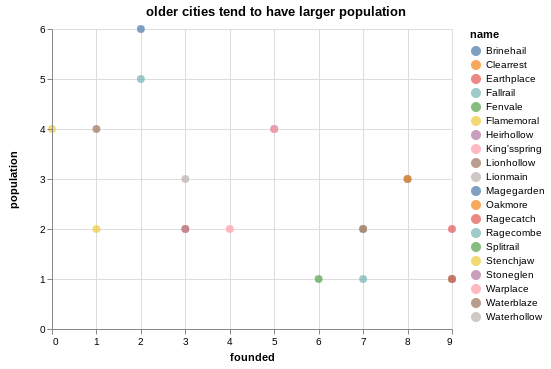

In [7]:
def population_age(towns):
    df = pd.DataFrame(index=range(len(all_towns)))
    df['name'] = [t.name for t in all_towns]
    df['population'] = [t.pop for t in all_towns]
    df['founded'] = [t.founded for t in all_towns]
    return df

alt.Chart(population_age(towns),title="older cities tend to have larger population").mark_circle(size=60).encode(
    y='population',
    x='founded',
    color='name',
    tooltip=['name']
)

There are convinience functions to fetch individual towns. 

In [8]:
towns.get_town(all_towns,all_towns[2].name)

town of Waterblaze: population: 4 location: [38,39] founded 1

In [9]:
world.df_features.head()

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,7.0,0,0:0,1.0,land
1:0,0,6.0,1,1:0,-1.0,ocean
2:0,0,7.0,2,2:0,-1.0,ocean
3:0,0,12.0,3,3:0,0.0,ocean
4:0,0,11.0,4,4:0,0.0,ocean


In [10]:
world.add_features(all_towns)

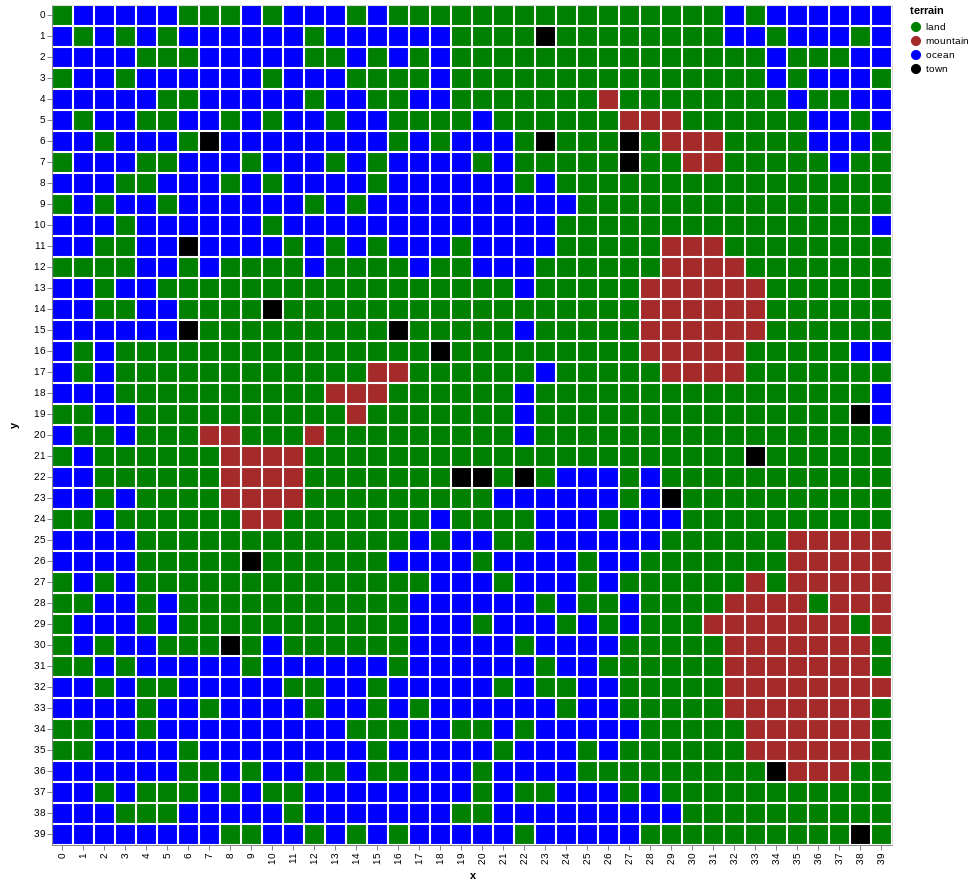

In [11]:
draw.drawCities(world.df_features)

In [12]:
world.df_features[world.df_features['feature'].isna()==False]

,y,rainfall,x,key,elevation,terrain,feature
key,,,,,,,
23:1,1,19.0,23,23:1,10.0,town,Oakmore
7:6,6,40.0,7,7:6,2.0,town,Flamemoral
23:6,6,18.0,23,23:6,10.0,town,Ragecombe
27:6,6,47.0,27,27:6,22.0,town,Fallrail
27:7,7,35.0,27,27:7,16.0,town,Fenvale
6:11,11,55.0,6,6:11,1.0,town,Lionmain
10:14,14,50.0,10,10:14,6.0,town,Warplace
6:15,15,25.0,6,6:15,2.0,town,Lionhollow
16:15,15,62.0,16,16:15,16.0,town,Ragecatch


In [13]:
#k is the actual k_means cluster object.
all_nations,k = nations.cluster_nations(world)

world.nations = all_nations

all_nations

{0: 'Waterridge',
 1: 'Earthwish',
 2: 'Rattown',
 3: 'Heartcraft',
 4: 'Stormloch',
 5: 'Oakmoral',
 6: 'Lionbrook',
 7: 'Lilycombe'}

In [14]:
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
world.df_features = nations.predict_nations(k,world)
world.df_features.head(20)

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
0:0,0,7.0,0,0:0,1.0,land,NaN,0.0,Waterridge
1:0,0,6.0,1,1:0,-1.0,ocean,NaN,NaN,NaN
2:0,0,7.0,2,2:0,-1.0,ocean,NaN,NaN,NaN
3:0,0,12.0,3,3:0,0.0,ocean,NaN,NaN,NaN
4:0,0,11.0,4,4:0,0.0,ocean,NaN,NaN,NaN
5:0,0,11.0,5,5:0,0.0,ocean,NaN,NaN,NaN
6:0,0,11.0,6,6:0,1.0,land,NaN,0.0,Waterridge
7:0,0,12.0,7,7:0,1.0,land,NaN,0.0,Waterridge
8:0,0,18.0,8,8:0,1.0,land,NaN,0.0,Waterridge


In [16]:
world.towns

In [17]:
world.towns = all_towns
for t in all_towns:
    try:
        t.set_starting_fielty(world)
    except:
        continue
        
town = world.towns[1]
print(f"{town.name} is loyal to the nation of {town.nation}")
print(f"{town.diplomacy}")

Flamemoral is loyal to the nation of Waterridge
{'nation': 'Waterridge', 'national fealty': 1}


In [18]:
#for each nation (n), appoint the most populus city (c) as it's capitol.
for n in np.unique(world.df_features['nation'].dropna()):
    c = world.df_features[(world.df_features['nation']==n)& \
          (world.df_features['terrain']=='town')]['feature'].tolist()
    #getting the town objects
    ts = [t for t in all_towns if t.name in c]
    #get population(p)
    p = [t.pop for t in ts]
    #getting the first town that has the max population, make that the capitol
    ts[np.argmax(p)].type='capitol'
    
all_towns

[town of Stenchjaw: population: 4 location: [20,22] founded 0,
 capitol of Flamemoral: population: 2 location: [7,6] founded 1,
 capitol of Waterblaze: population: 4 location: [38,39] founded 1,
 capitol of Magegarden: population: 6 location: [22,22] founded 2,
 capitol of Ragecombe: population: 5 location: [23,6] founded 2,
 town of Oakmore: population: 2 location: [23,1] founded 3,
 capitol of Stoneglen: population: 2 location: [18,16] founded 3,
 town of Lionmain: population: 3 location: [6,11] founded 3,
 town of King'sspring: population: 2 location: [38,19] founded 4,
 capitol of Heirhollow: population: 4 location: [29,23] founded 5,
 capitol of Warplace: population: 4 location: [10,14] founded 5,
 town of Fenvale: population: 1 location: [27,7] founded 6,
 town of Waterhollow: population: 2 location: [34,36] founded 7,
 town of Lionhollow: population: 2 location: [6,15] founded 7,
 town of Fallrail: population: 1 location: [27,6] founded 7,
 capitol of Brinehail: population: 3 lo

In [19]:
world.df_features[world.df_features['feature'].isna()==False].sort_values(['nation'])

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
29:23,23,2.0,29,29:23,2.0,town,Heirhollow,1.0,Earthwish
33:21,21,8.0,33,33:21,8.0,town,Earthplace,1.0,Earthwish
38:19,19,3.0,38,38:19,3.0,town,King'sspring,1.0,Earthwish
23:1,1,19.0,23,23:1,10.0,town,Oakmore,3.0,Heartcraft
23:6,6,18.0,23,23:6,10.0,town,Ragecombe,3.0,Heartcraft
27:6,6,47.0,27,27:6,22.0,town,Fallrail,3.0,Heartcraft
27:7,7,35.0,27,27:7,16.0,town,Fenvale,3.0,Heartcraft
16:15,15,62.0,16,16:15,16.0,town,Ragecatch,7.0,Lilycombe
18:16,16,41.0,18,18:16,15.0,town,Stoneglen,7.0,Lilycombe


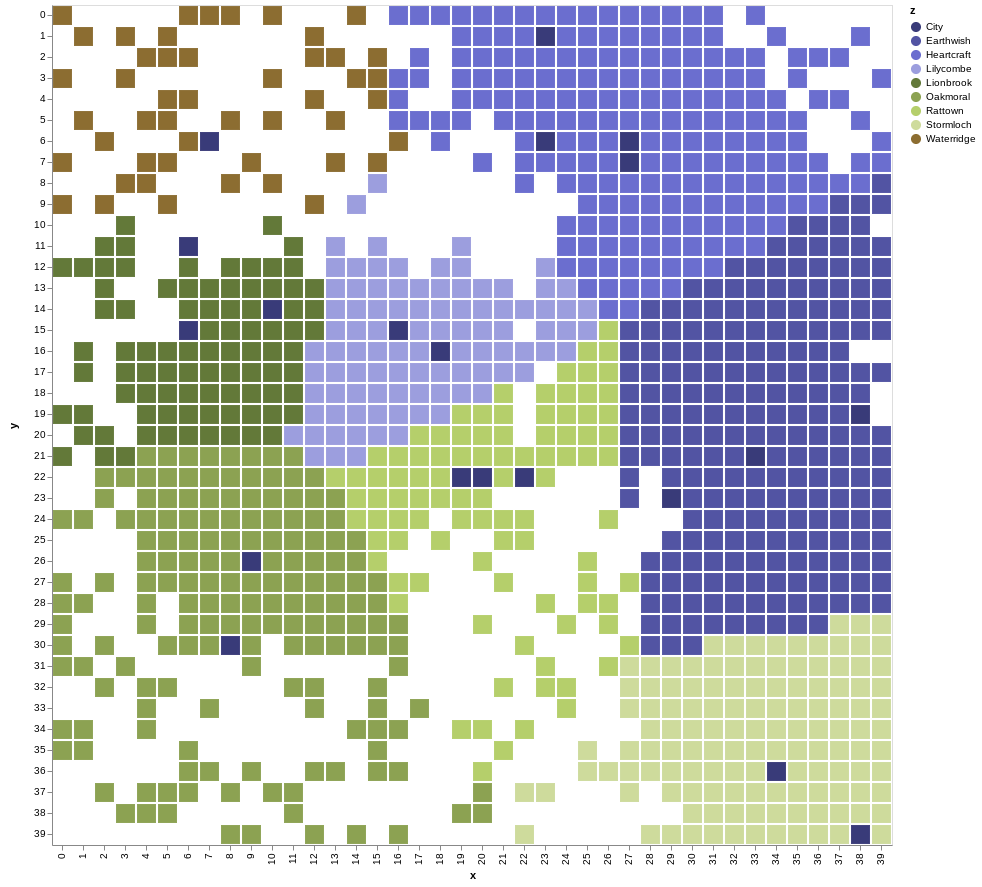

In [20]:
draw.drawboarders(world.df_features)

In [21]:
world.towns = all_towns

with open('world_2.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)